<h1><center>
    ECE 438 - Laboratory 8<br/>
    Number Representation and Waveform Quantization<br/>
    <small>Last Updated on May 5, 2022</small><br/>
    <br/>
    Date:3/23/2023<br/>
    Section:<br/>
</center></h1>

|Name |Signature |Time spent outside lab|
|:---:|:---:|:---:|
|Student Name #1 Ruixiang Wang| | |
|Student Name #2 [---%]| | |

||Below expectations| Lacks in some respect|Meets all expectations|
|:---:|:---:|:---:|:---:|
|**Completeness of the report**||||
|**Organization of the report**||||
|**Quality of figures**: *Correctly labeled with title, x-axis, y-axis, and name(s)*||||
|**Understanding and implementation of uniform quantizer (45 pts)**: *Image: original and quantized images, comparison, questions. Audio: Python figures, questions*||||
|**Understanding of error analysis (35 pts)**: *Error histograms, correlation, PSNR, rate-distortion curve, questions*||||
|**Understanding of max quantizer (20 pts)**: *Histograms, PSNR, comparison with uniform quantizer*||||

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import IPython.display as ipd
from helper import xcorr, lloyds

In [2]:
# make sure the plot is displayed in this notebook
%matplotlib inline
# specify the size of the plot
plt.rcParams['figure.figsize'] = (16, 6)

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

<h3 style="color:red;"><left>Exercise 3.3: Image Quantization</left></h3>

**1. Load the image and display it using the following sequence of commands.**

```python
image = plt.imread("fountainbw.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('image')
plt.show()
```

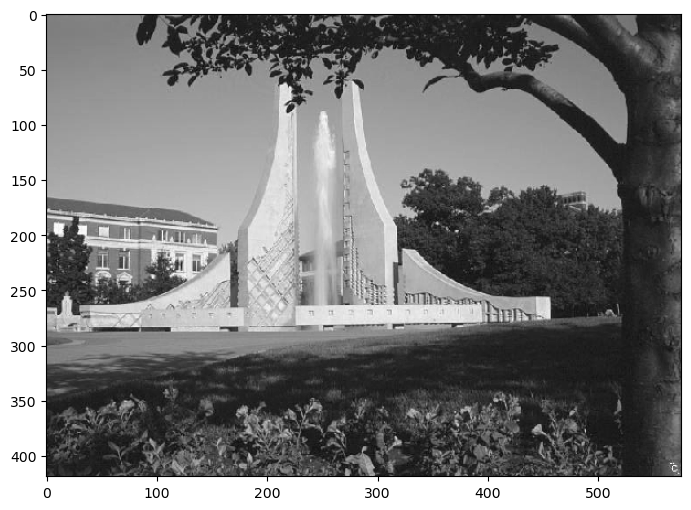

In [7]:
image = plt.imread("fountainbw.tif")
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('image')
plt.show()


**2. Print the data type of this image, then convert the image matrix to type `float`, and print the data type of this image again.**

* Use `image.dtype` to get the data type of `image`.

In [8]:
print(image.dtype)

image = image.astype(float)

print(image.dtype)

uint8
float64


**3. Complete the function below which will uniformly quantize an input array ```X``` (either a vector or a matrix) to an ```numBits```-bit array.**

In [9]:
def Uquant(X, numBits):
    """
    Parameters
    ---
    X: the input array to be quantized
    numBits: the number of bits. The number of quantization levels will be 2^numBits.
    
    Returns
    ---
    Y: the quantized array
    """
    N = 2**numBits
    delta = (np.max(X) - np.min(X))/(N-1)
    X_min = np.min(X)
    X = np.round((X - np.min(X))/delta)
    Y = X * delta + X_min
    
    return Y

**4. Use this function to quantize the fountain image to $7$, $6$, $5$, $4$, $3$, $2$, $1$ b/pel, and display and observe the output images. Don't forget the titles of the images.**

* To display a grayscale image `image`, use the following commands:
```python
plt.imshow(image.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()
```

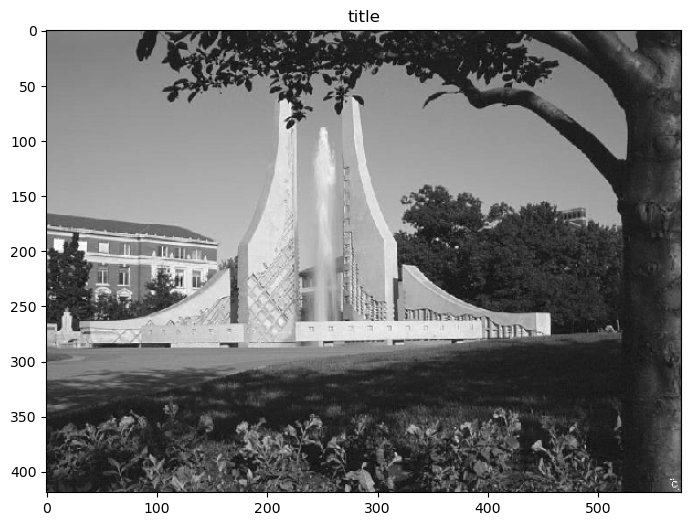

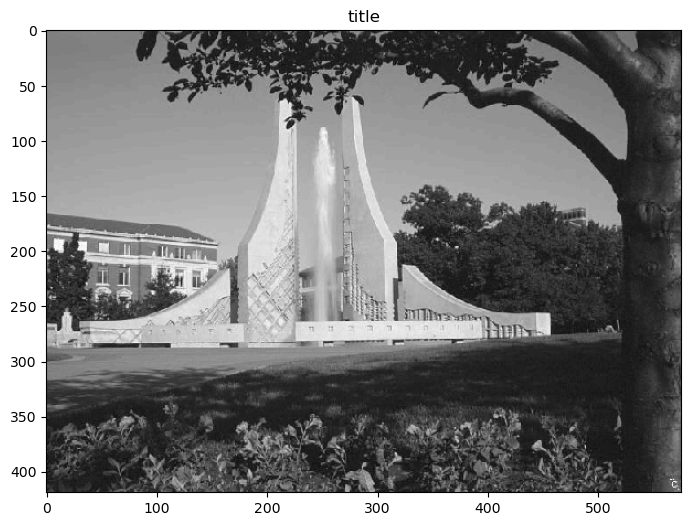

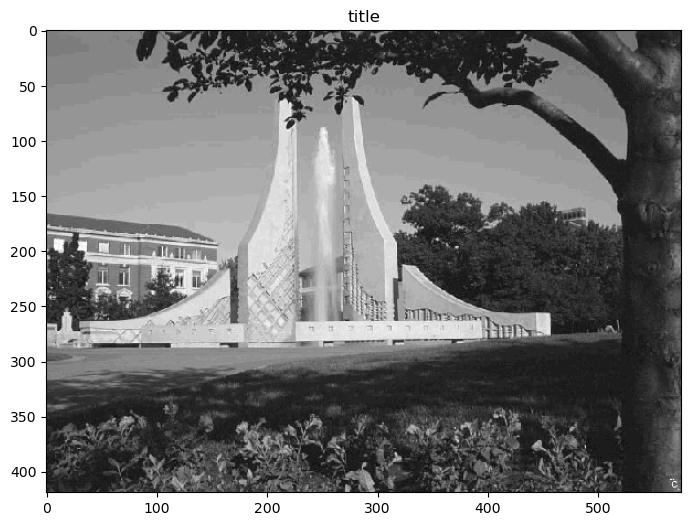

In [15]:
image7 = Uquant(image, 7)
plt.imshow(image7.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

image6 = Uquant(image, 6)
plt.imshow(image6.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

image5 = Uquant(image, 5)
plt.imshow(image5.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()


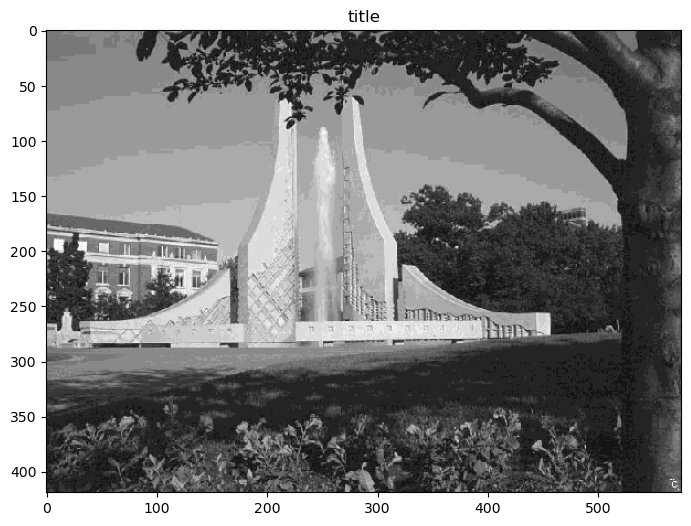

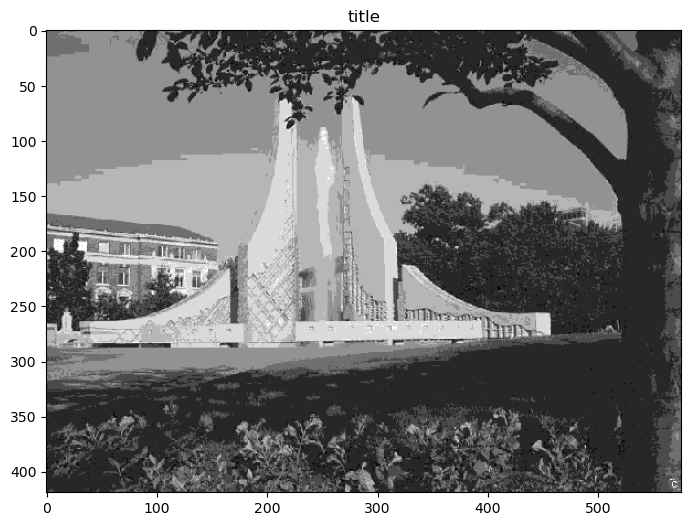

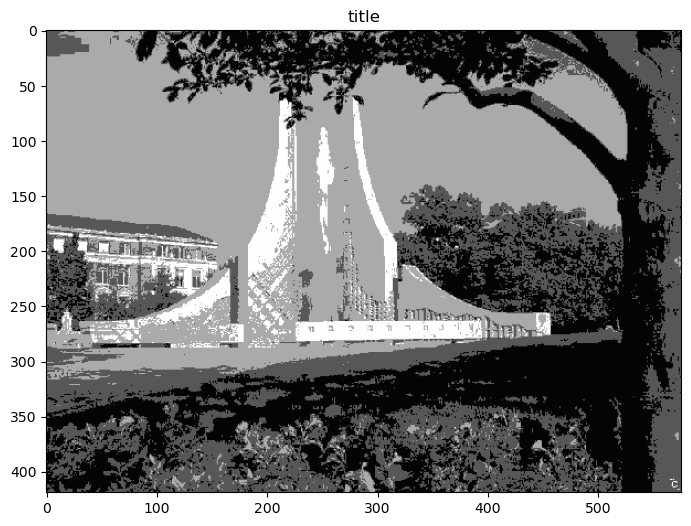

In [17]:

image4 = Uquant(image, 4)
plt.imshow(image4.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

image3 = Uquant(image, 3)
plt.imshow(image3.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()

image2 = Uquant(image, 2)
plt.imshow(image2.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()


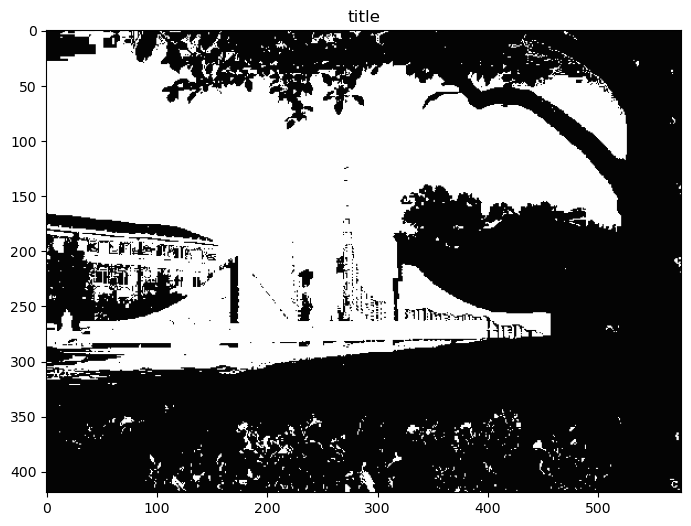

In [18]:

image1 = Uquant(image, 1)
plt.imshow(image1.astype(np.uint8), cmap='gray', vmin=0, vmax=255)
plt.title("title")
plt.show()


**5. Describe the artifacts (errors) that appear in the image as the number of bits is lowered.**

The artifacts(errors) increase as the number of bits is lowered

**6. Note the number of b/pel at which the image quality noticeably deteriorates.**

1

**7. Compare each of four quantized images ($7$, $4$, $2$ and $1$ b/per) to the original.**

For 7b/per, the difference is not obvious.
For 4b/per, the sky is quantized into smaller color blocks.
For 2b/per, there are essentially three color, black and white and grey.
For 1b/per, there are only black and white

<h3 style="color:red;"><left>Exercise 3.4: Audio Quantization</left></h3>

**1. Use your function `Uquant()` to quantize each of these signals: ```speech.au``` and ```music.au``` to 7, 4, 2 and 1 bits/sample. Listen to the original and quantized signals.**

* To read an audio file:
```python
speech, fs = sf.read("speech.au")  # speech is the signal vector, and fs is the sampling frequency
```
* To play a signal
```python
ipd.Audio(speech, rate=fs)
```

In [22]:
speech, fs = sf.read("speech.au")
music, fm = sf.read("music.au")
ipd.Audio(speech, rate=fs)

In [23]:
speech7 = Uquant(speech, 7)
ipd.Audio(speech7, rate=fs)

In [24]:
speech4 = Uquant(speech, 4)
ipd.Audio(speech4, rate=fs)

In [25]:
speech2 = Uquant(speech, 2)
ipd.Audio(speech2, rate=fs)

In [26]:
speech1 = Uquant(speech, 1)
ipd.Audio(speech1, rate=fs)

In [27]:
ipd.Audio(music, rate=fm)

In [28]:
music7 = Uquant(music, 7)
ipd.Audio(music7, rate=fm)

In [29]:
music4 = Uquant(music, 4)
ipd.Audio(music4, rate=fm)

In [30]:
music2 = Uquant(music, 2)
ipd.Audio(music2, rate=fm)

In [31]:
music1 = Uquant(music, 1)
ipd.Audio(music1, rate=fm)

**2. For each signal, describe the change in quality as the number of b/sample is reduced.**

For each signal, the quality decrease as the number of b/sample is reduced. The result of quality reduction sound like white noise

**3. For each signal, is there a point at which the signal quality deteriorates drastically? At what point (if any) does it become incomprehensible?**

At 2b/sample, the signal quality deteriorates drastically, and at 1b/sample, the output signal is incomprehensible.

**4. Which signal’s quality deteriorates faster as the number of levels decreases?**

The speech signal

**5. Do you think 4 b/sample is acceptable for telephone systems? What about 2 b/sample?**

4b/sample is acceptable under certain circumstances. 2b/sample is not reliable.

**6. Plot the four quantized `speech` signals over the index range $[7200:7400)$. Generate a similar figure for the `music` signal, using the same indices.**

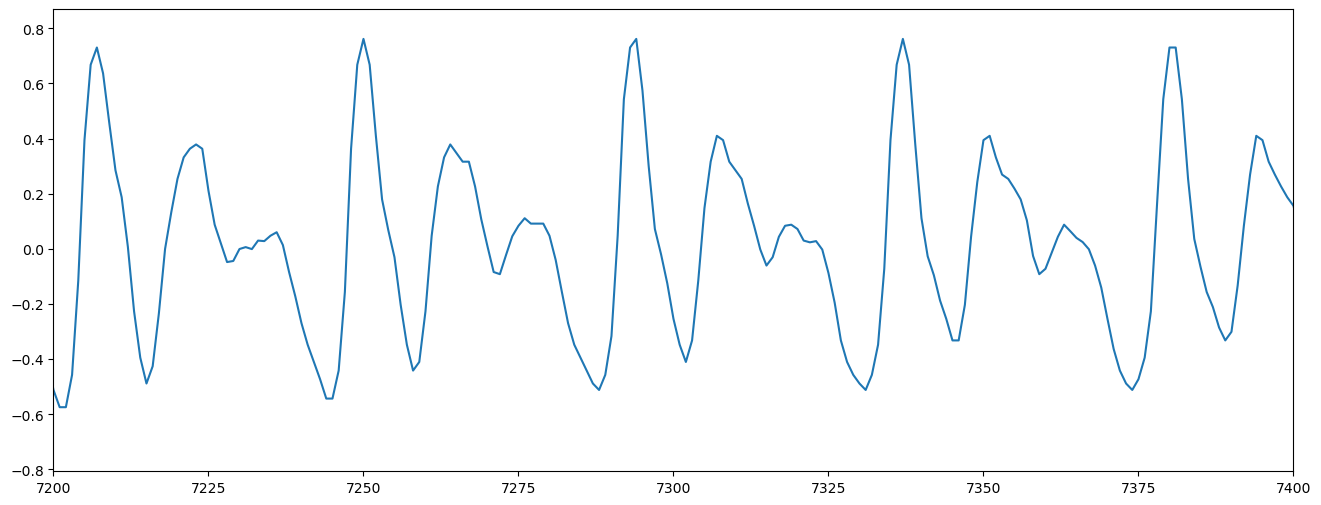

In [75]:
plt.xlim(7200,7400)
plt.plot(speech)


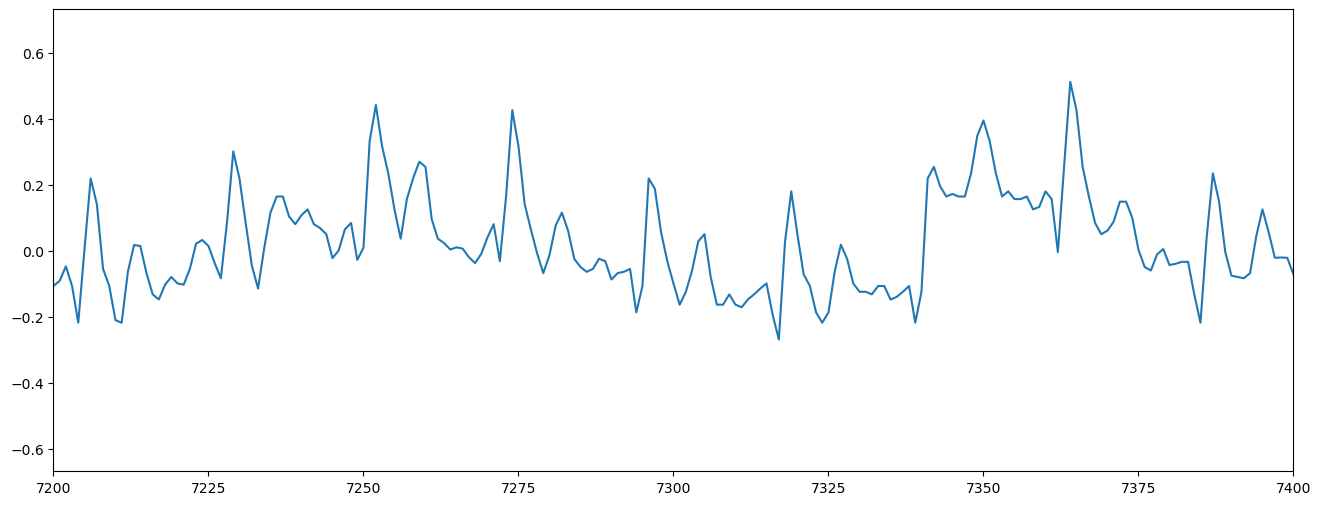

In [35]:
plt.xlim(7200,7400)
plt.plot(music)

<h3 style="color:red;"><left>Exercise 3.5. Error Analysis</left></h3>

**1. Compute the error signal for the quantized speech for $7$, $4$, $2$ and $1$ b/sample.**

In [37]:
E7 = speech7 - speech
E4 = speech4 - speech
E2 = speech2 - speech
E1 = speech1 - speech

**2. Use the command [```plt.hist(E, bins=20)```](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.hist.html) to generate 20-bin histograms for each of the four error signals.**

(array([ 998.,  921., 1353.,  895.,  991., 2122.,  894.,  950., 1178.,
         748., 1225., 1115., 2013., 1011.,  804., 1486.,  673.,  887.,
        1371., 2124.]),
 array([-5.94588152e-03, -5.35782942e-03, -4.76977731e-03, -4.18172521e-03,
        -3.59367311e-03, -3.00562100e-03, -2.41756890e-03, -1.82951679e-03,
        -1.24146469e-03, -6.53412586e-04, -6.53604823e-05,  5.22691622e-04,
         1.11074373e-03,  1.69879583e-03,  2.28684793e-03,  2.87490004e-03,
         3.46295214e-03,  4.05100424e-03,  4.63905635e-03,  5.22710845e-03,
         5.81516056e-03]),
 <BarContainer object of 20 artists>)

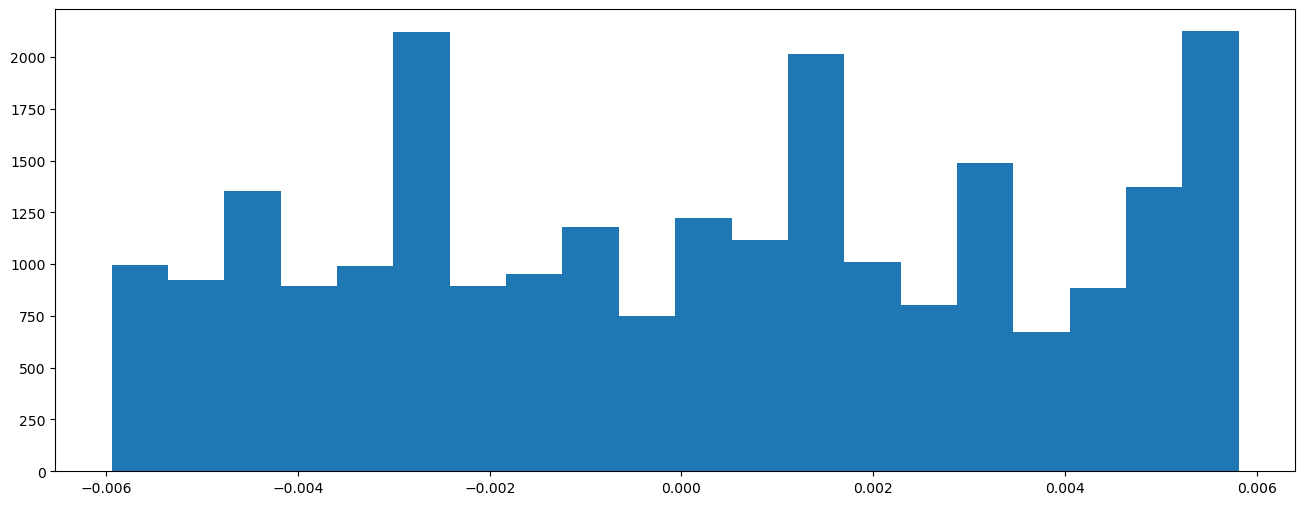

In [40]:
plt.hist(E7, bins=20)

(array([1435., 1957., 2426., 2061., 2159., 1507., 1312.,  905.,  913.,
         697.,  847.,  657.,  773.,  898.,  637.,  760.,  983.,  706.,
         917., 1209.]),
 array([-0.05068359, -0.04561523, -0.04054687, -0.03547852, -0.03041016,
        -0.0253418 , -0.02027344, -0.01520508, -0.01013672, -0.00506836,
         0.        ,  0.00506836,  0.01013672,  0.01520508,  0.02027344,
         0.0253418 ,  0.03041016,  0.03547852,  0.04054687,  0.04561523,
         0.05068359]),
 <BarContainer object of 20 artists>)

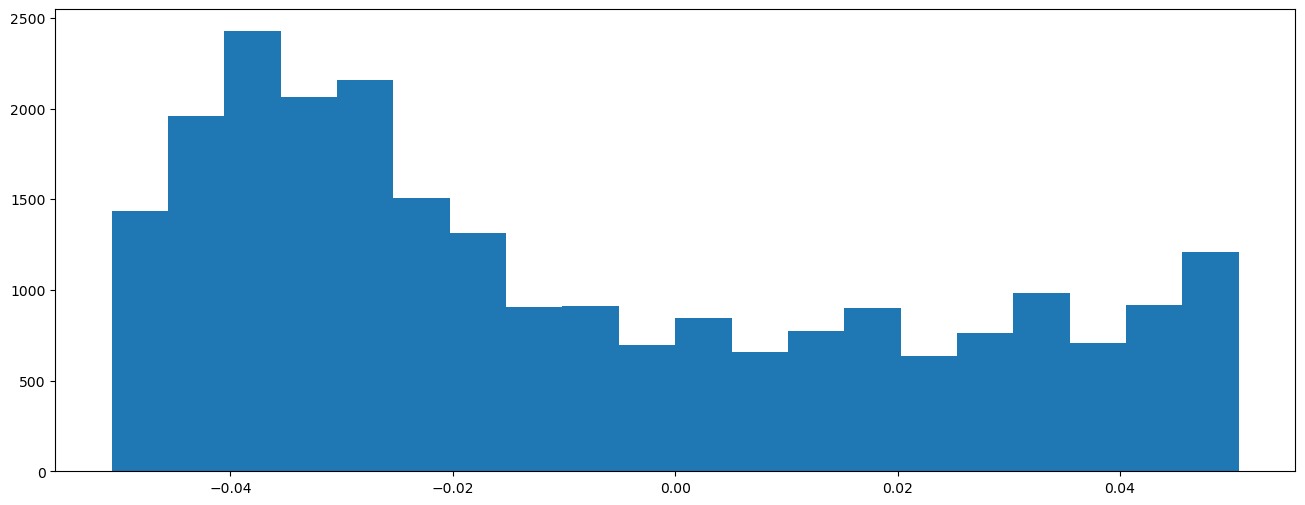

In [41]:
plt.hist(E4, bins=20)

(array([7943., 2886., 1162.,  878.,  766.,  501.,  486.,  440.,  433.,
         478.,  361.,  446.,  454.,  447.,  465.,  487.,  720.,  911.,
        1171., 2324.]),
 array([-2.52766927e-01, -2.27478027e-01, -2.02189128e-01, -1.76900228e-01,
        -1.51611328e-01, -1.26322428e-01, -1.01033529e-01, -7.57446289e-02,
        -5.04557292e-02, -2.51668294e-02,  1.22070312e-04,  2.54109701e-02,
         5.06998698e-02,  7.59887695e-02,  1.01277669e-01,  1.26566569e-01,
         1.51855469e-01,  1.77144368e-01,  2.02433268e-01,  2.27722168e-01,
         2.53011068e-01]),
 <BarContainer object of 20 artists>)

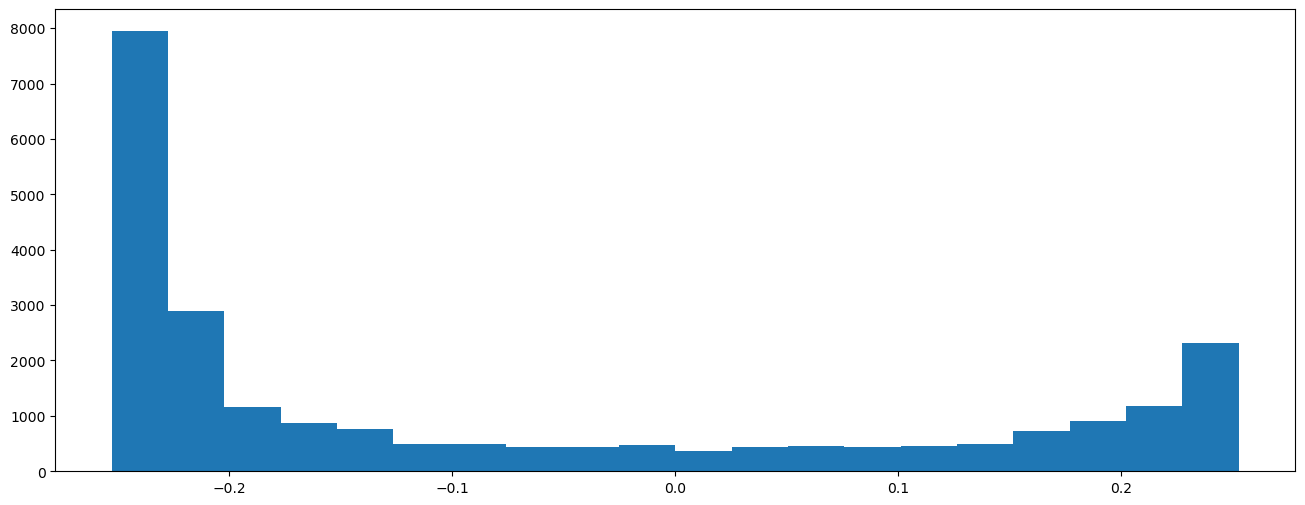

In [42]:
plt.hist(E2, bins=20)

(array([1.1985e+04, 1.9070e+03, 1.0420e+03, 7.5200e+02, 3.3700e+02,
        1.3700e+02, 6.9000e+01, 3.3000e+01, 4.0000e+00, 1.1000e+01,
        2.6000e+01, 1.8000e+01, 3.0000e+01, 4.4000e+01, 1.0500e+02,
        2.2600e+02, 4.7400e+02, 8.4100e+02, 1.4540e+03, 4.2640e+03]),
 array([-7.60498047e-01, -6.84436035e-01, -6.08374023e-01, -5.32312012e-01,
        -4.56250000e-01, -3.80187988e-01, -3.04125977e-01, -2.28063965e-01,
        -1.52001953e-01, -7.59399414e-02,  1.22070312e-04,  7.61840820e-02,
         1.52246094e-01,  2.28308105e-01,  3.04370117e-01,  3.80432129e-01,
         4.56494141e-01,  5.32556152e-01,  6.08618164e-01,  6.84680176e-01,
         7.60742188e-01]),
 <BarContainer object of 20 artists>)

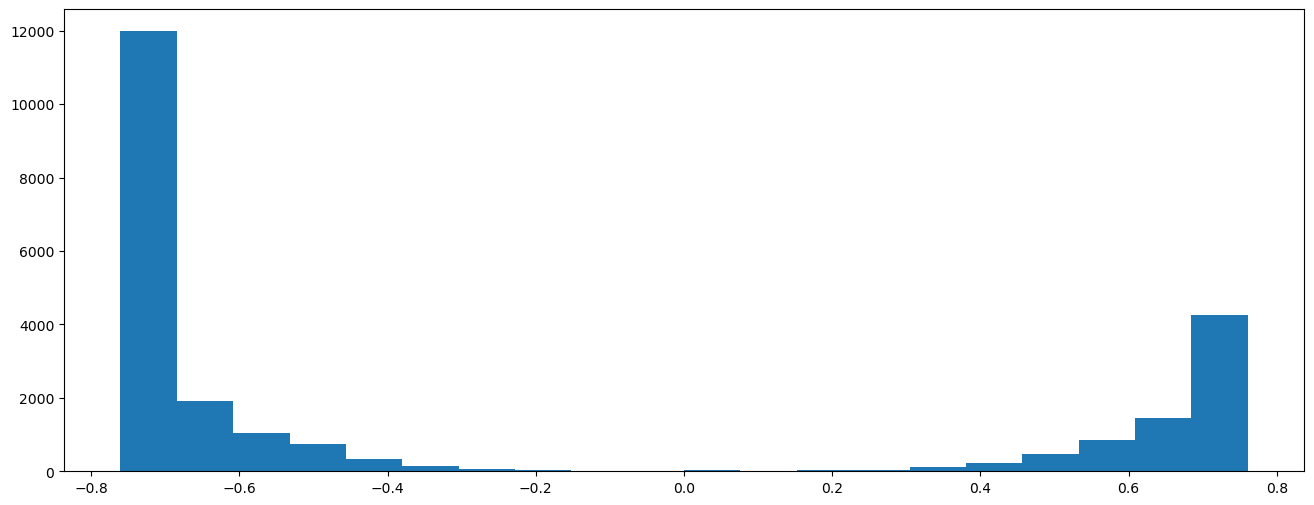

In [43]:
plt.hist(E1, bins=20)

**3. How does the number of quantization levels seem to affect the shape of the distribution?**

Less quantization levels gives bigger error. In higher quantization, the error looks like it is randomly distributed.

**4. Explain why the error histograms you obtain might not be uniform?**

The error is not uniform if the error is mostly due to quantization

**5. Compute and plot an estimate of the autocorrelation function for each of the four error signals using the following commands:**
```python
lags, r = xcorr(E, maxlags=200)
plt.plot(lags, r)
plt.show()
```
**Hint:** function ```xcorr``` is provided in the file ```helper.py```

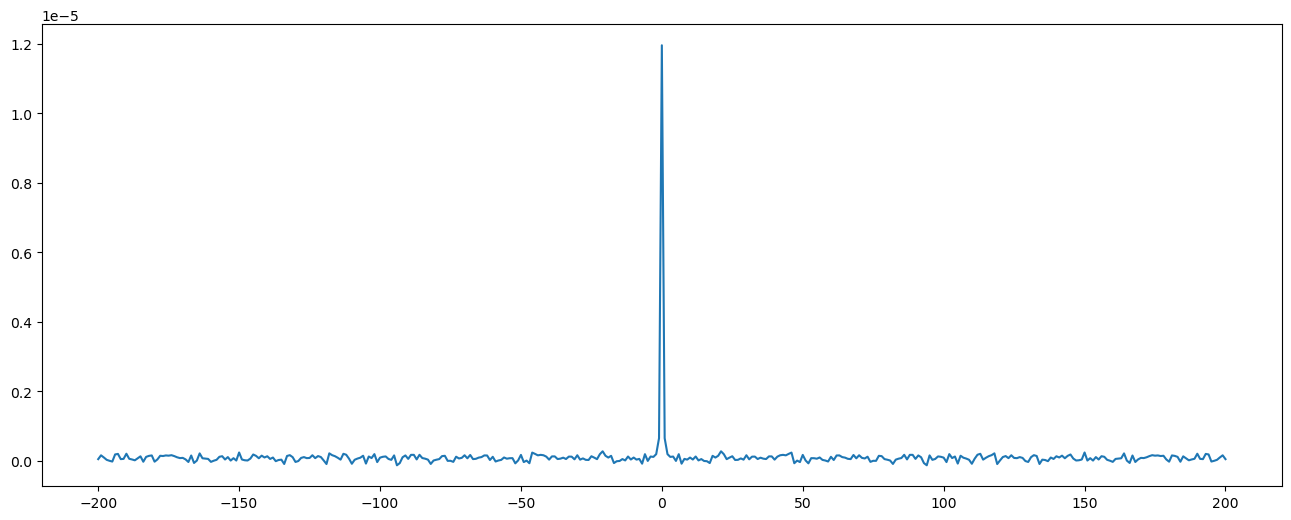

In [46]:
lags, r = xcorr(E7, E7, maxlags=200)
plt.plot(lags, r)
plt.show()

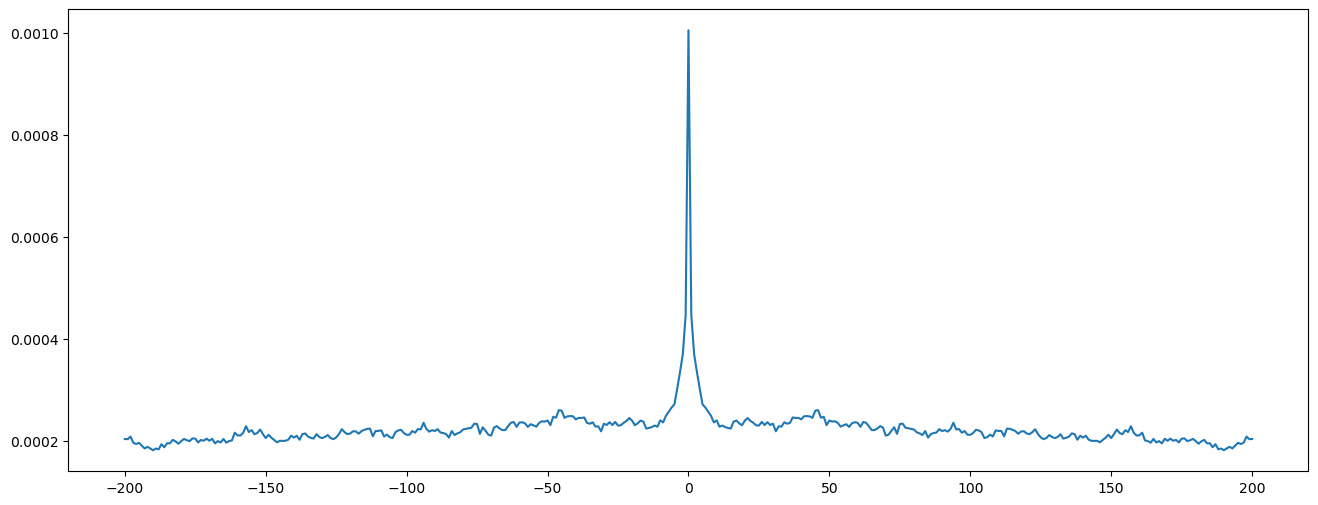

In [47]:
lags, r = xcorr(E4,E4, maxlags=200)
plt.plot(lags, r)
plt.show()

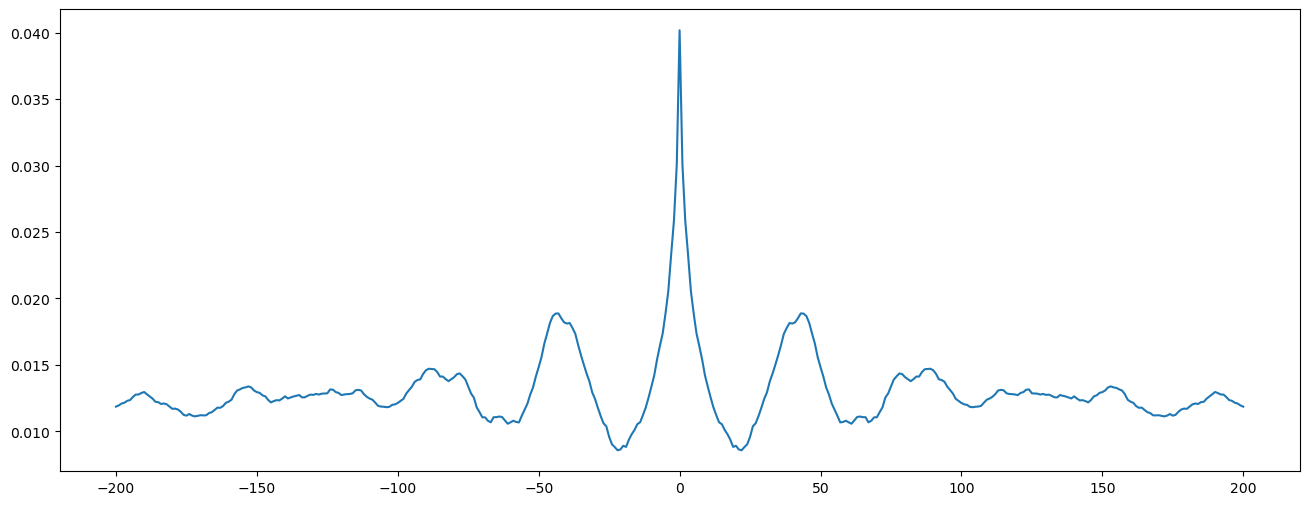

In [48]:
lags, r = xcorr(E2,E2, maxlags=200)
plt.plot(lags, r)
plt.show()

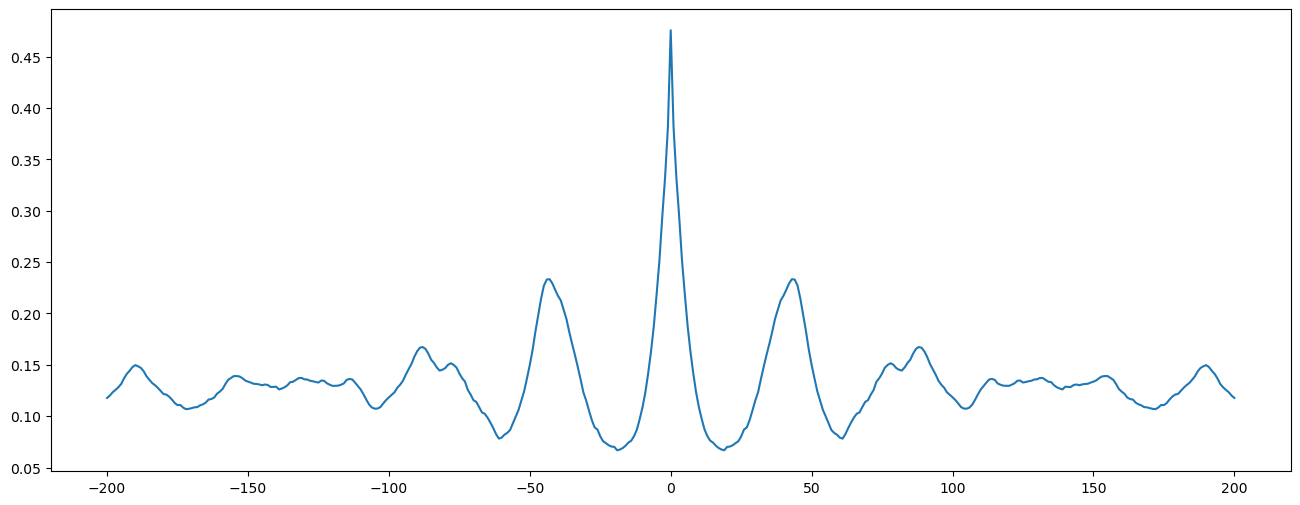

In [49]:
lags, r = xcorr(E1,E1, maxlags=200)
plt.plot(lags, r)
plt.show()

**6. Now compute and plot an estimate of the cross-correlation function between the quantized speech $Y$ and each error signal $E$ using**
```python
lags, r = xcorr(E, Y, maxlags=200)
plt.plot(lags, r)
plt.show()
```
**Hint:** function ```xcorr``` is provided in the file ```helper.py```

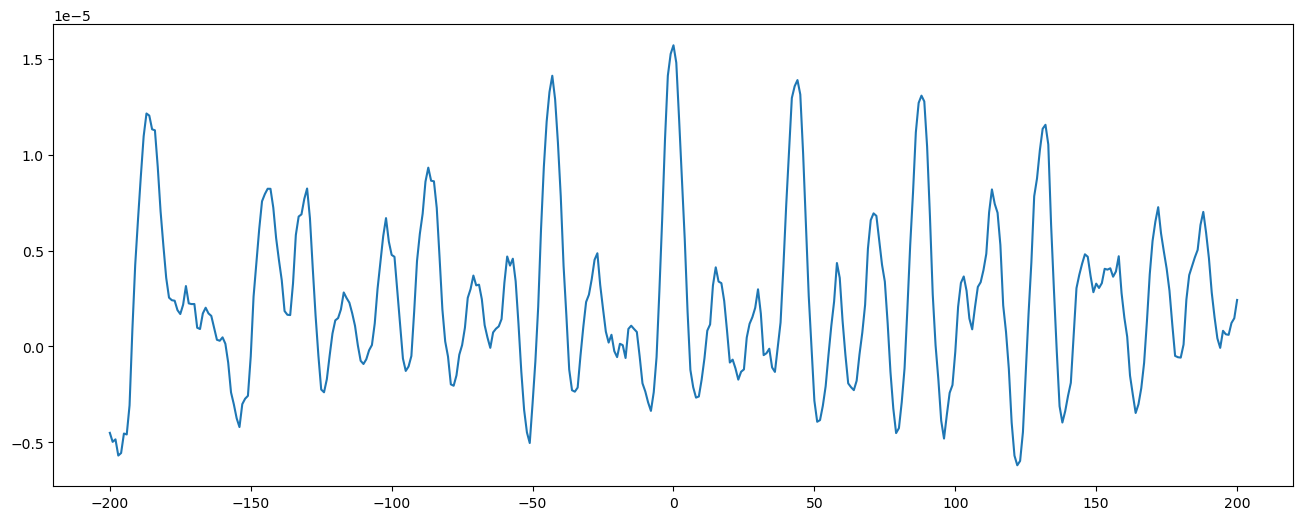

In [51]:
lags, r = xcorr(E7, speech7, maxlags=200)
plt.plot(lags, r)
plt.show()

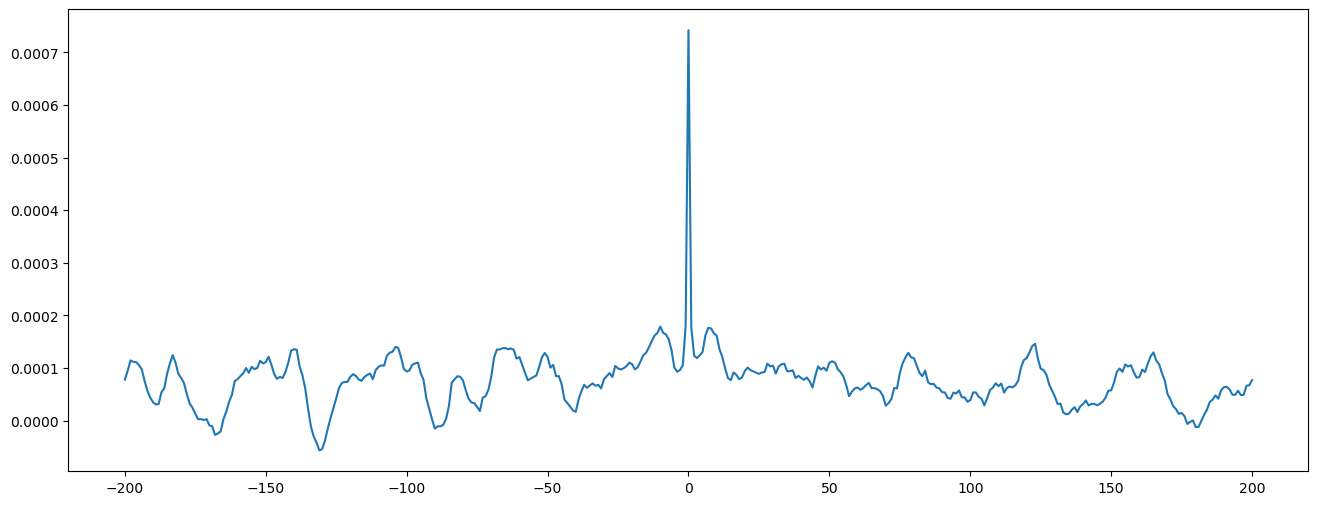

In [52]:
lags, r = xcorr(E4, speech4, maxlags=200)
plt.plot(lags, r)
plt.show()

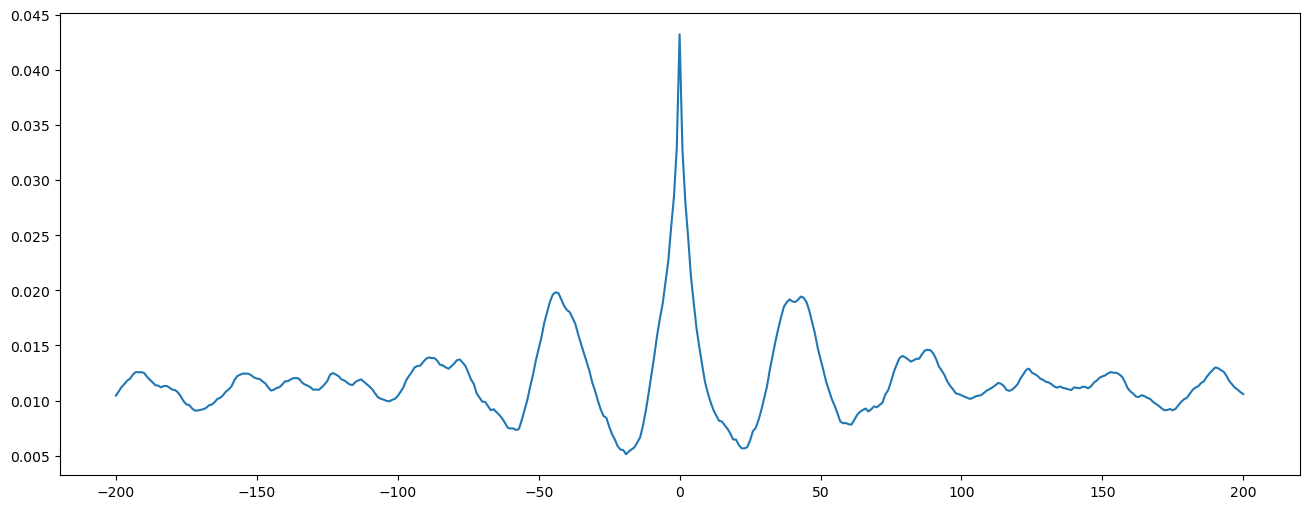

In [53]:
lags, r = xcorr(E2, speech2, maxlags=200)
plt.plot(lags, r)
plt.show()

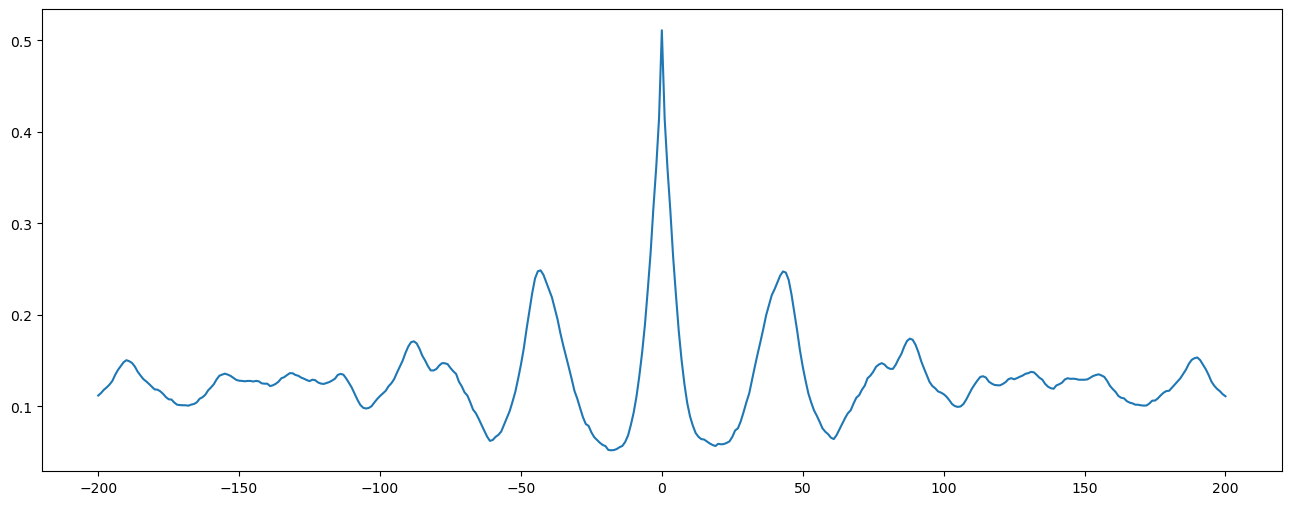

In [54]:
lags, r = xcorr(E1, speech1, maxlags=200)
plt.plot(lags, r)
plt.show()

**7. Is the autocorrelation influenced by the number of quantization levels? Do samples in the error signal appear to be correlated with each other?**

Yes. Samples in the error signal is correlated with each other.

**8. Does the number of quantization levels influence the cross-correlation?**

Yes, the more quantization, the weaker is the cross-correlation.

<h3 style="color:red;"><left>Exercise 3.6: Signal to Noise Ratio</left></h3>

**1. Complete the function below that calculates the power of a sampled signal `x`.**

In [57]:
def get_power(x):
    """
    Parameters
    ---
    x: the input signal
    
    Returns
    ---
    P: the power of the signal
    """
    
    P = np.sum(x[1:]**2)/len(x)
    return P

**2. Compute the PSNR for the four quantized speech signals from the previous section.**

In [76]:
PSNR7 = get_power(speech7)/get_power(E7)
PSNR4 = get_power(speech4)/get_power(E4)
PSNR2 = get_power(speech2)/get_power(E2)
PSNR1 = get_power(speech1)/get_power(E1)

**3. Assuming that the speech is sampled at $8$kHz, plot the rate distortion curve using $\frac{1}{\text{PSNR}}$ as the measure of distortion. Generate this curve by computing the PSNR for $7, 6, 5,\dots, 1$ bits/sample. Make sure the axes of the graph are in terms of *distortion* and *bit rate*.**

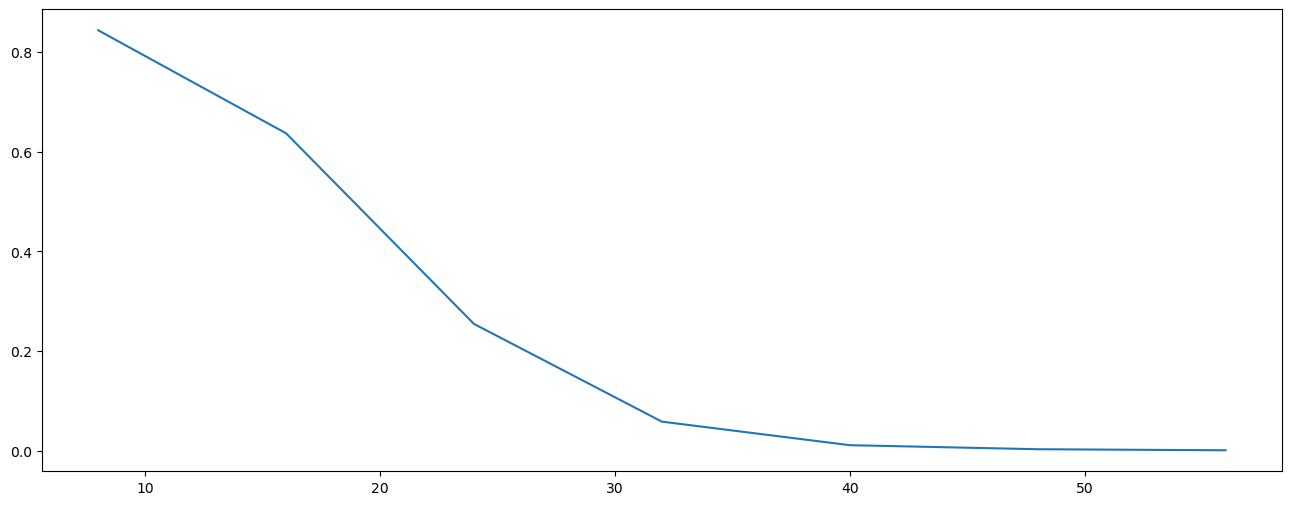

In [77]:
signal_distortion = [0]*7
bit_rate = [0]*7
speech6 = Uquant(speech, 6)
speech5 = Uquant(speech, 5)
speech3 = Uquant(speech, 3)
E6 = speech6 - speech
E5 = speech5 - speech
E3 = speech3 - speech
PSNR6 = get_power(speech6)/get_power(E6)
PSNR5 = get_power(speech5)/get_power(E5)
PSNR3 = get_power(speech3)/get_power(E3)

signal_distortion[0] = 1/PSNR7
bit_rate[0] = 8 * 7
signal_distortion[1] = 1/PSNR6
bit_rate[1] = 8 * 6
signal_distortion[2] = 1/PSNR5
bit_rate[2] = 8 * 5
signal_distortion[3] = 1/PSNR4
bit_rate[3] = 8 * 4
signal_distortion[4] = 1/PSNR3
bit_rate[4] = 8 * 3
signal_distortion[5] = 1/PSNR2
bit_rate[5] = 8 * 2
signal_distortion[6] = 1/PSNR1
bit_rate[6] = 8 * 1

plt.plot(bit_rate, signal_distortion)

<h3 style="color:red;"><left>Exercise 3.8</left></h3>

**1. First plot a $40$-bin histogram of this speech signal using ```plt.hist(speech, bins=40)```, and make an initial guess of the four optimal quantization levels. Print out the histogram and the initial guess of the quantization levels.**

<function print>

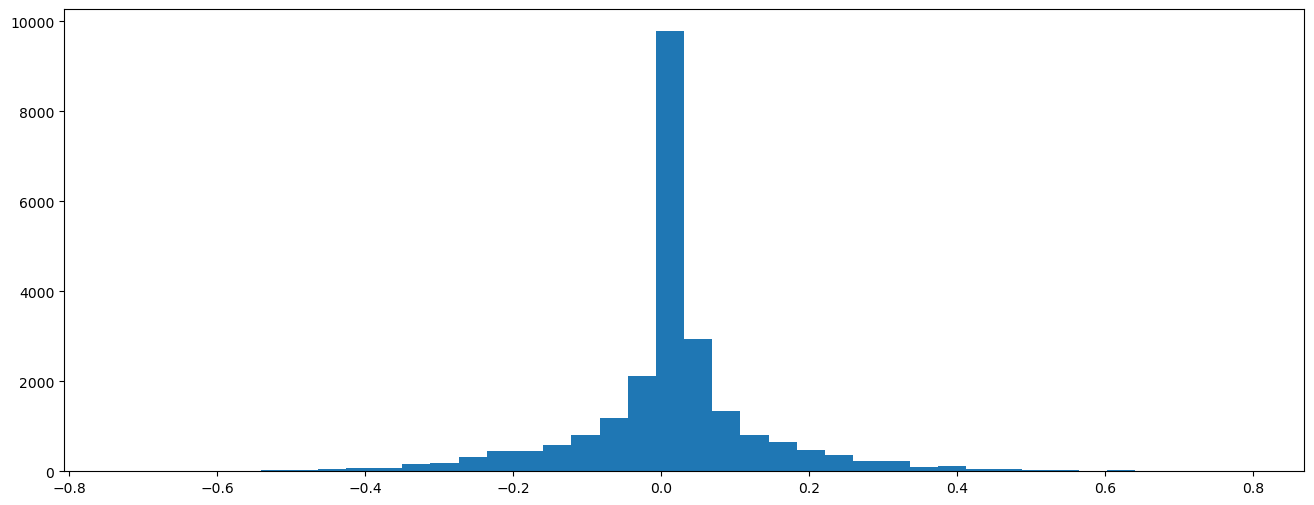

In [82]:
plt.hist(speech,bins=40)
print

**2. Use the function ```lloyds()``` to compute an optimal $4$-level codebook using `speech.au` as the training set.**

In [68]:
partition,codebook=lloyds(speech,[-0.3, -0.1, 0.1, 0.3])
print(partition)
print(codebook)

[-0.17775693 -0.02570996  0.15095067]
[-0.27381915 -0.0816947   0.03027478  0.27162657]


**3. Once the optimal codebook is obtained, use the `codebook` and `partition` vectors to quantize the speech signal.**

* This may be done with a *for* loop and *if* statements.

In [79]:
speech_q = np.zeros(len(speech))

for i in range(len(speech)):
    if speech[i] < -0.178:
        speech_q[i] = -0.274
    elif speech[i] < -0.026:
        speech_q[i] = -0.082
    elif speech[i] < 0.151:
        speech_q[i] = 0.03
    else:
        speech_q[i] = 0.272


**4. Compute the error signal and PSNR.**

In [80]:
E = speech_q - speech
PSNR = get_power(speech_q)/get_power(E)

**5. Plot the histogram in Q1 again. However, on this histogram plot, also mark where the optimal quantization levels fall along the $x$-axis.**

* To draw a vertical line, use `plt.axvline(x=0.8, color='r')` to plot a vertical line $x=0.8$ of red color.

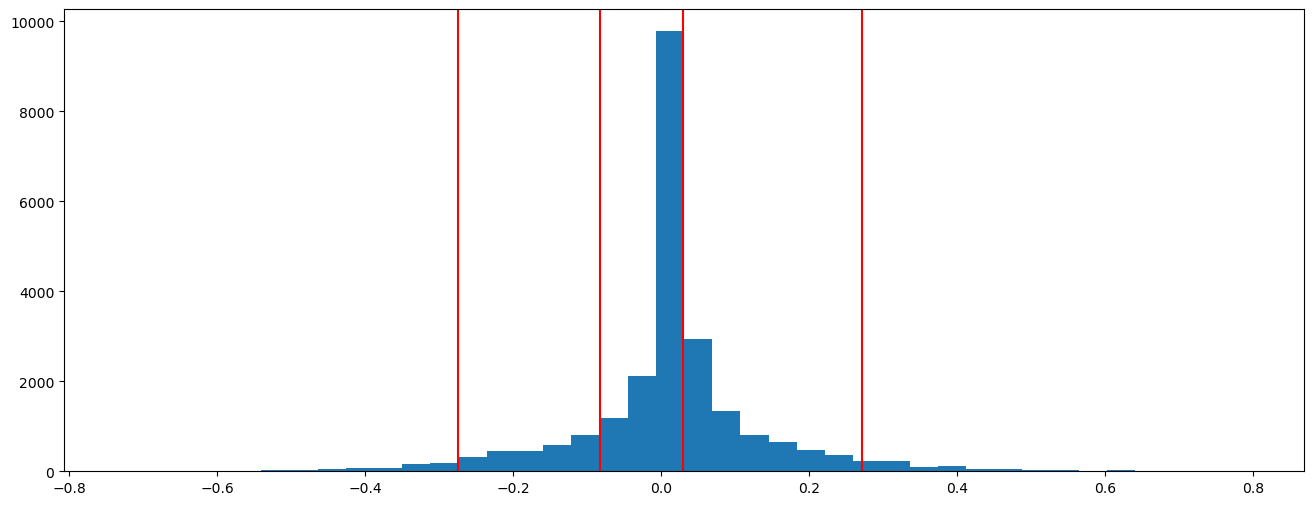

In [83]:
plt.hist(speech,bins=40)
plt.axvline(x=-0.274, color='r')
plt.axvline(x=-0.082, color='r')
plt.axvline(x=0.03, color='r')
plt.axvline(x=0.272, color='r')

**6. Play the quantized audio, and compare the sound quality of the uniform- and max-quantized signals.**

In [85]:
speech4 = Uquant(speech, 4)
ipd.Audio(speech4, rate=fs)

In [84]:

ipd.Audio(speech_q, rate=fs)

**7. If the speech signal was uniformly distributed, would the two quantizers be the same? Explain your answer.**

Yes, the density function is uniformly distributed so qk is uniformly spaced.